In [1]:
from utils import *
from datasets import *
from datadealing import *
from models import *

lib imported succesfully


c:\Users\stend\Documents\python_projects\varizellazoster - Copy\src\lib\dataprocessing\dataprocessor.py:490: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df[colname] = self.df[colname].replace(mapping_dict)


In [2]:
from models.tgcn_lt_predictor import TGCNLongTermModel

window_size = 2
prediction_horizon = 10

trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= window_size,
                        graph_type = 'annual', threshold = 0.5)  


trialrun = DataLoader(raw_data=data_to_load, val_ratio=0.2, test_ratio=0.2,
                     standardization_method='zscore', window_size=window_size, graph_type='annual')

tgcn_lt_model = TGCNLongTermModel(
    dataloader=trialrun,
    node_features=window_size,
    hidden_dim=64,
    window_size=window_size,
    prediction_horizon=prediction_horizon,
    teacher_forcing_ratio=1,
    teacher_forcing_decay=0.9,
    lr=0.0001,
    updates=True
)

tgcn_lt_model.train(epochs=100)

predictions, inputs = tgcn_lt_model.predict_long_term(num_sequences=3)
print(f"Predictions shape: {predictions.shape}")
print(f"Inputs shape: {inputs.shape}")

tgcn_lt_model.plot_long_term_predictions(county_idx=0, sequence_idx=0, added_text=" - 10 step ahead")
tgcn_lt_model.plot_long_term_predictions(county_idx=1, sequence_idx=0, added_text=" - 10 step ahead")


Raw data shape: (16, 365)
Data timepoints shape: (365, 3)
Transposed raw_data to shape: (365, 16)
Year 2013: processing weeks 0 to 51 (52 weeks)
  Yearly data shape: (52, 16)
  Created 92 edges
Year 2014: processing weeks 52 to 103 (52 weeks)
  Yearly data shape: (52, 16)
  Created 74 edges
Year 2015: processing weeks 104 to 156 (53 weeks)
  Yearly data shape: (53, 16)
  Created 40 edges
Year 2016: processing weeks 157 to 208 (52 weeks)
  Yearly data shape: (52, 16)
  Created 108 edges
Year 2017: processing weeks 209 to 260 (52 weeks)
  Yearly data shape: (52, 16)
  Created 108 edges
Year 2018: processing weeks 261 to 312 (52 weeks)
  Yearly data shape: (52, 16)
  Created 62 edges
Year 2019: processing weeks 313 to 364 (52 weeks)
  Yearly data shape: (52, 16)
  Created 66 edges
Raw data shape: (16, 365)
Data timepoints shape: (365, 3)
Transposed raw_data to shape: (365, 16)
Year 2013: processing weeks 0 to 51 (52 weeks)
  Yearly data shape: (52, 16)
  Created 236 edges
Year 2014: proce

KeyboardInterrupt: 

Raw data shape: (16, 365)
Data timepoints shape: (365, 3)
Transposed raw_data to shape: (365, 16)
Year 2013: processing weeks 0 to 51 (52 weeks)
  Yearly data shape: (52, 16)
  Created 92 edges
Year 2014: processing weeks 52 to 103 (52 weeks)
  Yearly data shape: (52, 16)
  Created 74 edges
Year 2015: processing weeks 104 to 156 (53 weeks)
  Yearly data shape: (53, 16)
  Created 40 edges
Year 2016: processing weeks 157 to 208 (52 weeks)
  Yearly data shape: (52, 16)
  Created 108 edges
Year 2017: processing weeks 209 to 260 (52 weeks)
  Yearly data shape: (52, 16)
  Created 108 edges
Year 2018: processing weeks 261 to 312 (52 weeks)
  Yearly data shape: (52, 16)
  Created 62 edges
Year 2019: processing weeks 313 to 364 (52 weeks)
  Yearly data shape: (52, 16)
  Created 66 edges
Epoch 000, Train Loss: 1.0153, Val Loss: 0.8588
Epoch 010, Train Loss: 0.7830, Val Loss: 0.6765
Epoch 020, Train Loss: 0.6123, Val Loss: 0.5300
Epoch 030, Train Loss: 0.5929, Val Loss: 0.5117
Epoch 040, Train Lo

(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Predictions - Berlin tgcn - window size 2'}, xlabel='Week', ylabel='predictions'>)

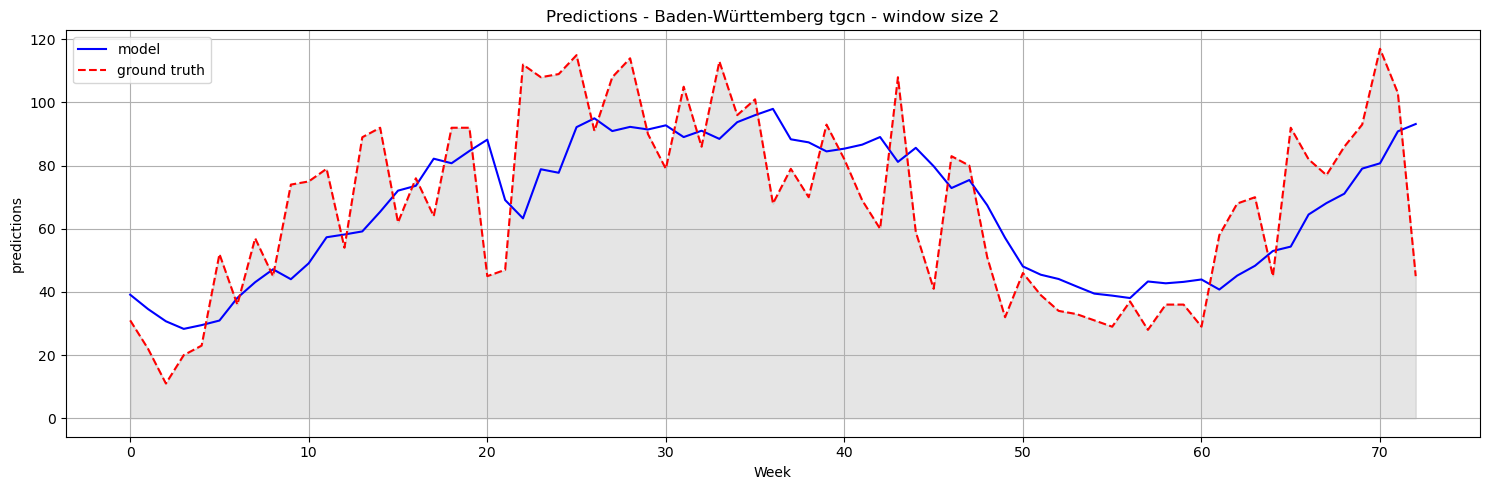

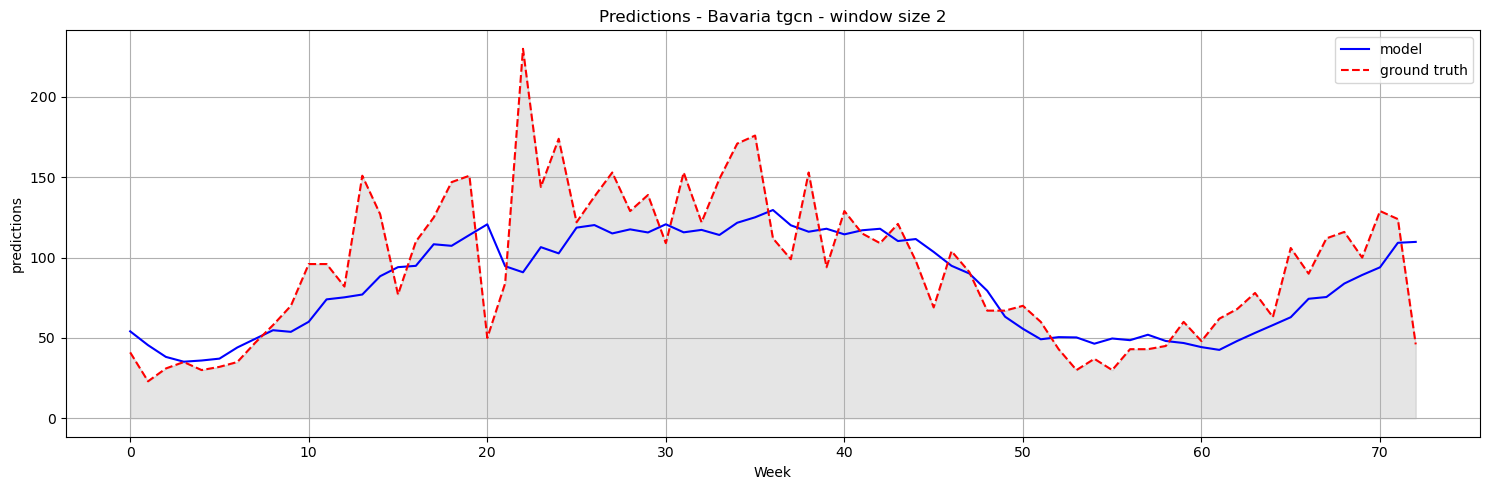

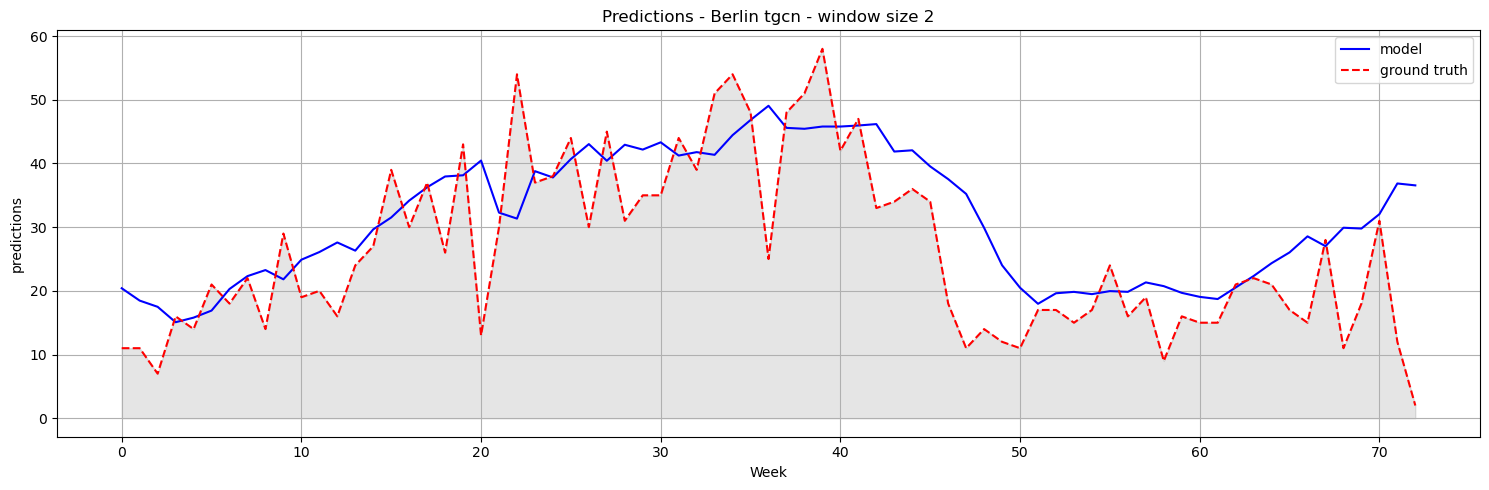

In [5]:
window_size = 4

trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= window_size,
                        graph_type = 'annual', threshold = 0.5)  

tgcn_model = TGCNModel(
    dataloader=trialrun,  # Your existing dataloader
    node_features=window_size,  # Number of features per node
    hidden_dim=32,    # Hidden dimension for GCN and GRU
    periods=1,        # Number of future periods to predict
    lr=0.00001,
    window_size=window_size,
    updates=False
)

tgcn_model.train(epochs = 100)
tgcn_model.evaluate()
modeltype = " tgcn - window size 2"
tgcn_model.plot_predictions(0, added_text = modeltype)
tgcn_model.plot_predictions(1, added_text = modeltype)
tgcn_model.plot_predictions(2, added_text = modeltype)


Epoch 000, Train Loss: 0.8809, Val Loss: 0.7053
Epoch 010, Train Loss: 0.5962, Val Loss: 0.5025
Epoch 020, Train Loss: 0.5907, Val Loss: 0.5012
Epoch 030, Train Loss: 0.5873, Val Loss: 0.5009
Epoch 040, Train Loss: 0.5842, Val Loss: 0.5006
Epoch 050, Train Loss: 0.5814, Val Loss: 0.5002
Epoch 060, Train Loss: 0.5789, Val Loss: 0.4995
Epoch 070, Train Loss: 0.5767, Val Loss: 0.4988
Epoch 080, Train Loss: 0.5747, Val Loss: 0.4982
Epoch 090, Train Loss: 0.5729, Val Loss: 0.4977


(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Predictions - Berlin tgcn - window size 2'}, xlabel='Week', ylabel='predictions'>)

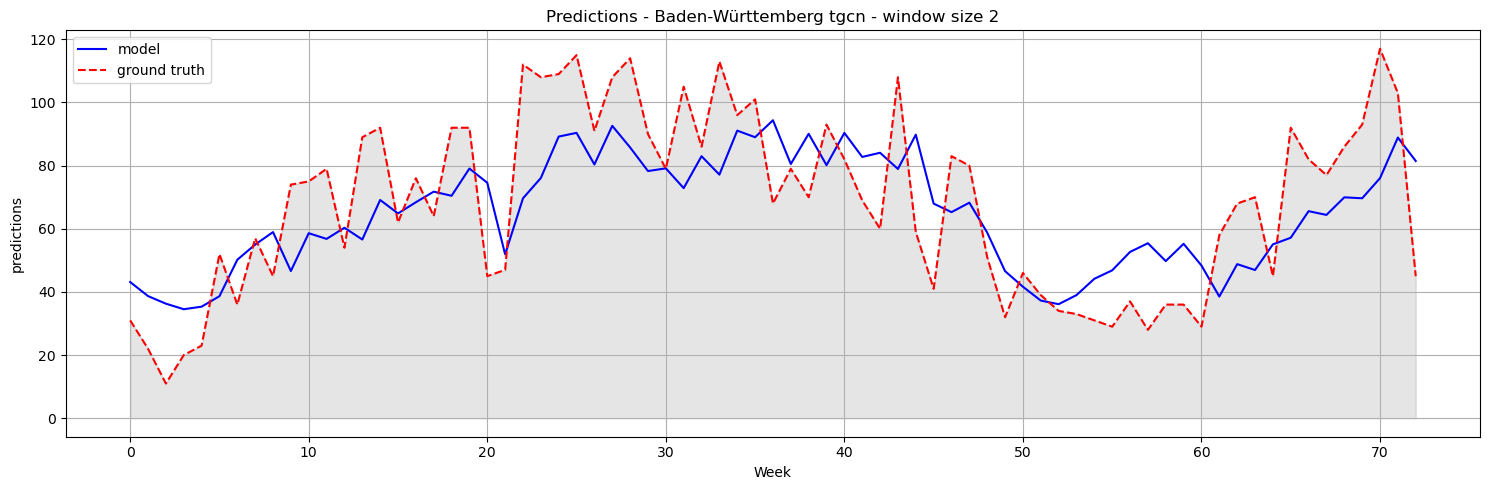

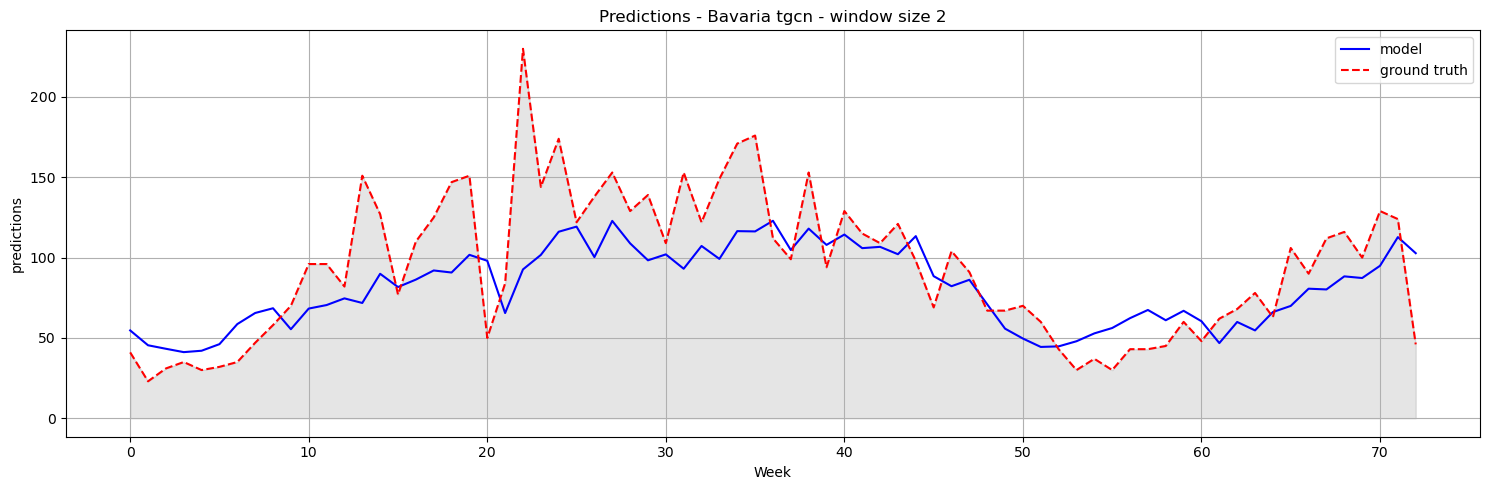

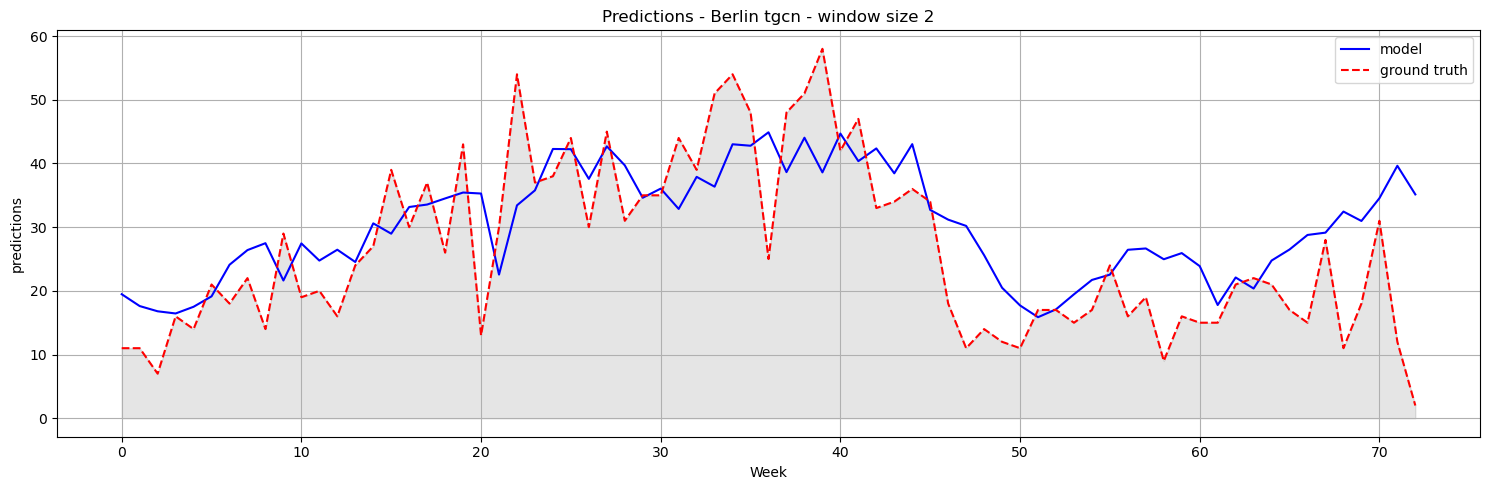

In [ ]:
window_size = 2

trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= window_size,
                        graph_type = 'annual')  

tgcn_model = TGCNModel(
    dataloader=trialrun,  # Your existing dataloader
    node_features=window_size,  # Number of features per node
    hidden_dim=32,    # Hidden dimension for GCN and GRU
    periods=1,        # Number of future periods to predict
    lr=0.0001,
    window_size=window_size,
    updates=False
)

tgcn_model.train(epochs = 100)
tgcn_model.evaluate()
modeltype = " tgcn - window size 2"
tgcn_model.plot_predictions(0, added_text = modeltype)
tgcn_model.plot_predictions(1, added_text = modeltype)
tgcn_model.plot_predictions(2, added_text = modeltype)


✅ BasicGNN model built with 65 parameters


c:\Users\stend\Documents\python_projects\varizellazoster - Copy\src\german vzv\models\core.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index  = torch.tensor(snapshot.edge_index).to(self.device)


Epoch 000, Train Loss: 0.9875, Val Loss: 0.6965
✅ Model trained and saved
✅ Model tested


(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Predictions - Berlin basic gcn - identity graph - window size 2'}, xlabel='Week', ylabel='predictions'>)

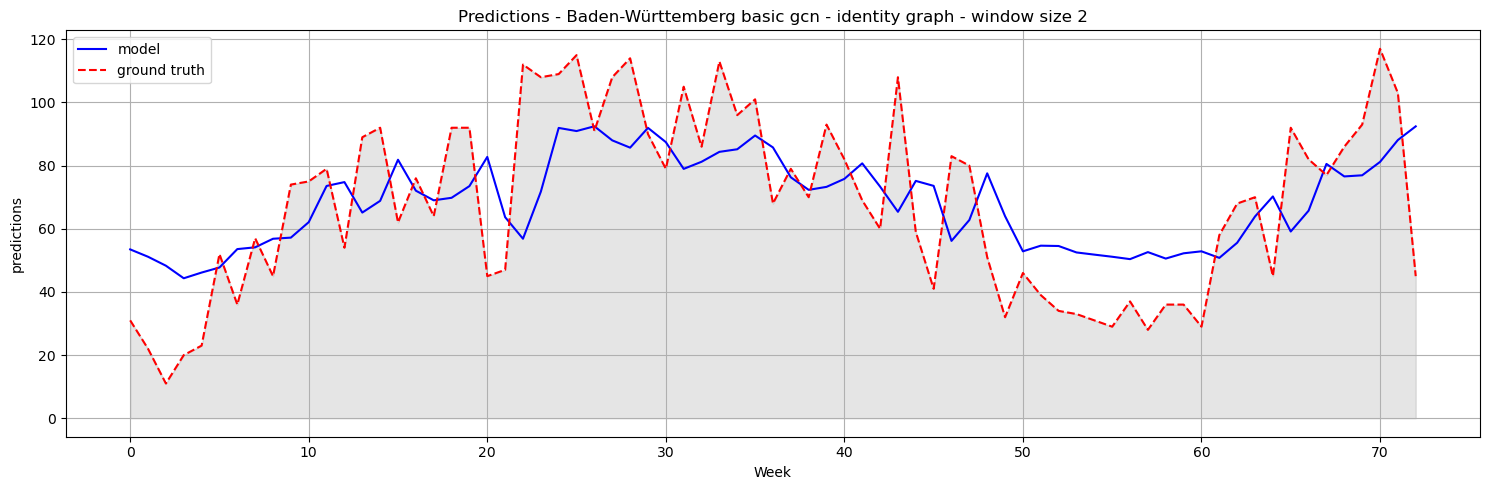

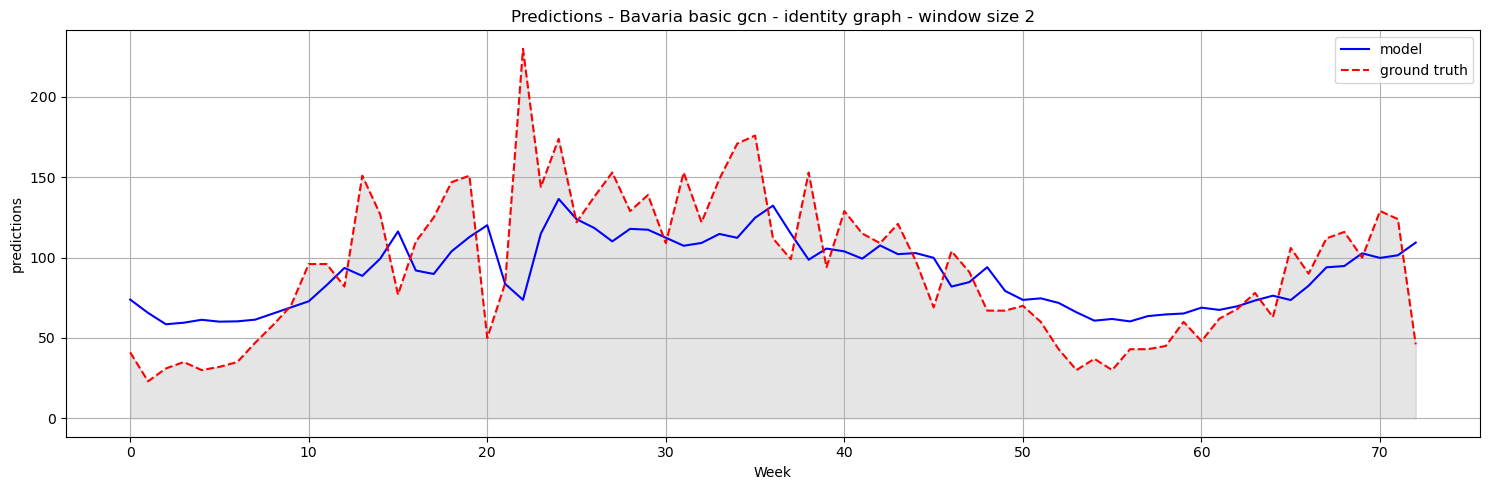

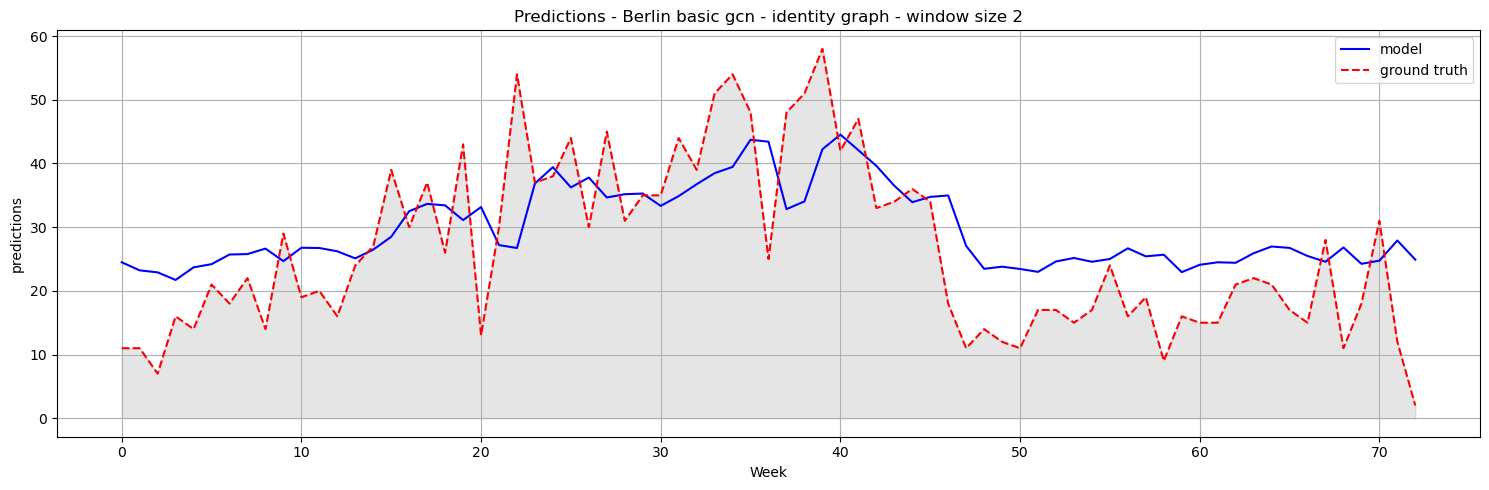

In [2]:
trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= 2,
                        graph_type = 'identity')  

trialrun_model =   BasicGNNModel(input_dim = 2,
                                hidden_dim = 16,
                                dataloader = trialrun,
                                optimizer_class=torch.optim.Adam,
                                criterion=torch.nn.MSELoss(),
                                dropout = 0.25,
                                lr=0.0001,
                                updates = True
)     
trialrun_model.train(epochs = 10)
trialrun_model.evaluate()
modeltype = " basic gcn - identity graph - window size 2"
trialrun_model.plot_predictions(0, added_text = modeltype)
trialrun_model.plot_predictions(1, added_text = modeltype)
trialrun_model.plot_predictions(2, added_text = modeltype)

✅ BasicGNN model built with 6466 parameters


c:\Users\stend\Documents\python_projects\varizellazoster - Copy\src\german vzv\models\core.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index  = torch.tensor(snapshot.edge_index).to(self.device)


Epoch 000, Train Loss: 0.0591, Val Loss: 0.0344
Epoch 010, Train Loss: 0.0310, Val Loss: 0.0277
Epoch 020, Train Loss: 0.0297, Val Loss: 0.0263
Epoch 030, Train Loss: 0.0296, Val Loss: 0.0262
Epoch 040, Train Loss: 0.0296, Val Loss: 0.0262
Epoch 050, Train Loss: 0.0296, Val Loss: 0.0262
Early stopping at epoch 51
✅ Model trained and saved
✅ Model tested


(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Predictions - Berlin basic gcn - identity graph - window size 2'}, xlabel='Week', ylabel='predictions'>)

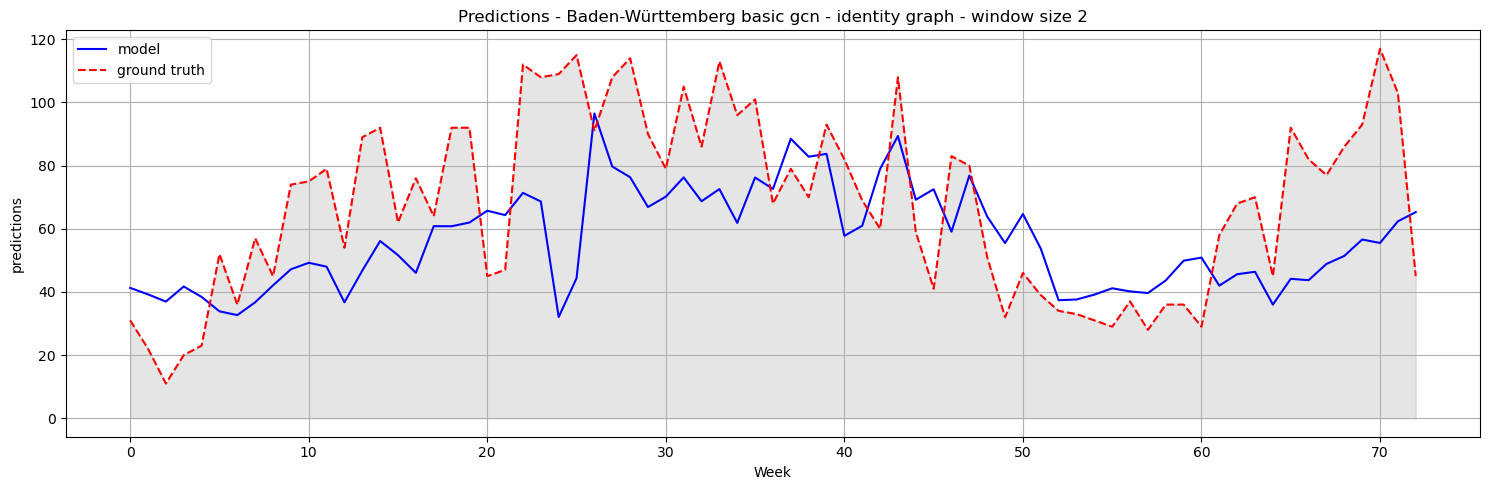

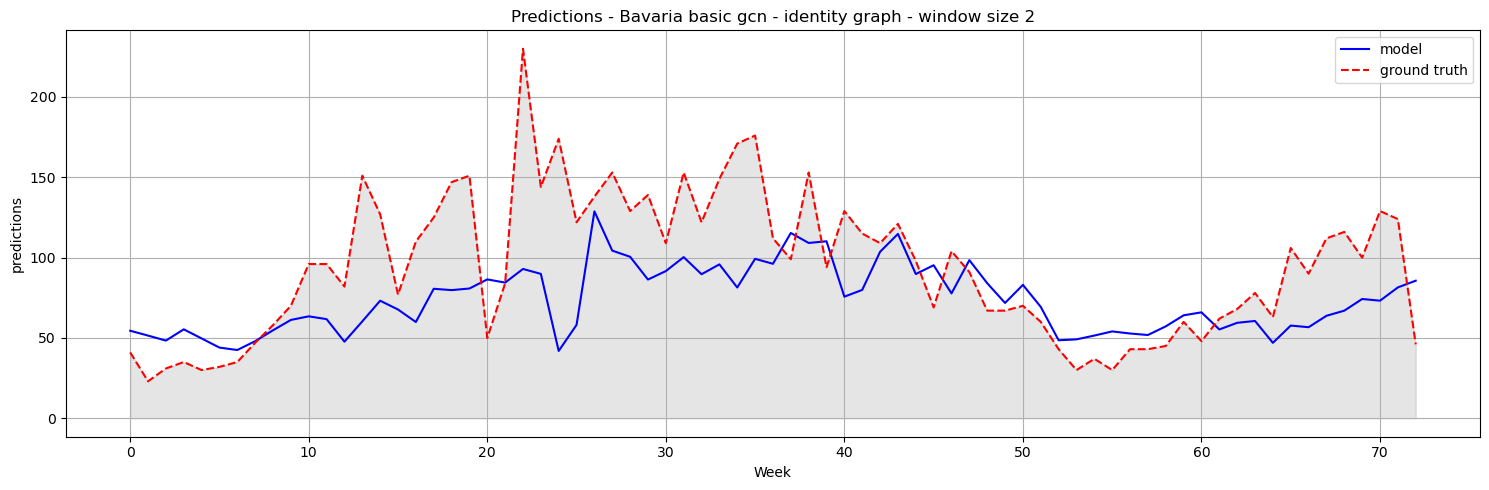

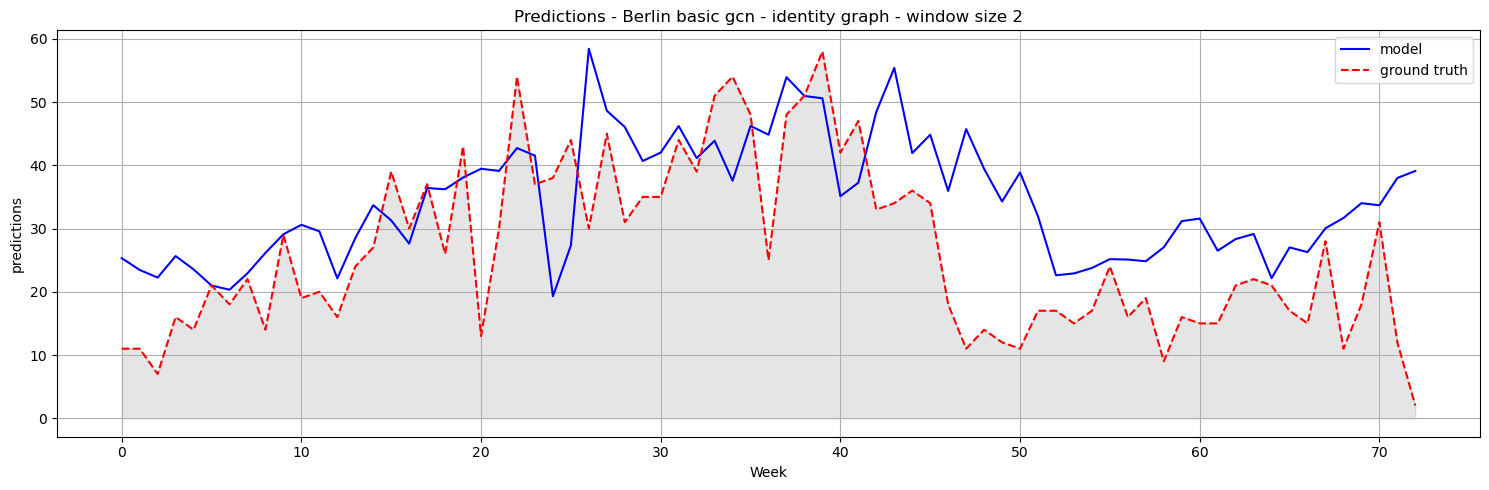

In [19]:
trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'minmax',
                        window_size= 4,
                        graph_type = 'annual',
                        threshold = 0.0)  

trialrun_model =   A3TGCNModel(node_features = 1, 
                               periods = 1,
                                dataloader = trialrun,
                                optimizer_class=torch.optim.Adam,
                                criterion=torch.nn.MSELoss(),
                                lr=0.0001,
                                updates = True
)     
trialrun_model.train(epochs = 100)
trialrun_model.evaluate()
modeltype = " basic gcn - identity graph - window size 2"
trialrun_model.plot_predictions(0, added_text = modeltype)
trialrun_model.plot_predictions(1, added_text = modeltype)
trialrun_model.plot_predictions(2, added_text = modeltype)

In [ ]:
data_to_load

array([[  0.,   0.,   0., ..., 117., 103.,  45.],
       [  2.,   1.,   0., ..., 129., 124.,  46.],
       [  0.,   0.,   1., ...,  31.,  12.,   2.],
       ...,
       [  5.,  14.,   8., ...,   5.,   4.,   3.],
       [  0.,   0.,   0., ...,  34.,  27.,   6.],
       [  4.,  13.,   4., ...,  11.,  11.,   3.]])

Raw data shape: (16, 365)
Data timepoints shape: (365, 3)
Transposed raw_data to shape: (365, 16)
Year 2013: processing weeks 0 to 51 (52 weeks)
  Yearly data shape: (52, 16)
  Created 236 edges
Year 2014: processing weeks 52 to 103 (52 weeks)
  Yearly data shape: (52, 16)
  Created 254 edges
Year 2015: processing weeks 104 to 156 (53 weeks)
  Yearly data shape: (53, 16)
  Created 240 edges
Year 2016: processing weeks 157 to 208 (52 weeks)
  Yearly data shape: (52, 16)
  Created 254 edges
Year 2017: processing weeks 209 to 260 (52 weeks)
  Yearly data shape: (52, 16)
  Created 240 edges
Year 2018: processing weeks 261 to 312 (52 weeks)
  Yearly data shape: (52, 16)
  Created 246 edges
Year 2019: processing weeks 313 to 364 (52 weeks)
  Yearly data shape: (52, 16)
  Created 230 edges
✅ BasicGNN model built with 65 parameters


c:\Users\stend\Documents\python_projects\varizellazoster - Copy\src\german vzv\models\core.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index  = torch.tensor(snapshot.edge_index).to(self.device)


Epoch 000, Train Loss: 1.1146, Val Loss: 0.7731
Epoch 010, Train Loss: 0.7495, Val Loss: 0.6236
Epoch 020, Train Loss: 0.6540, Val Loss: 0.5707
Epoch 030, Train Loss: 0.6298, Val Loss: 0.5628
Epoch 040, Train Loss: 0.6317, Val Loss: 0.5633
Early stopping at epoch 44
✅ Model trained and saved
✅ Model tested


(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Predictions - Berlin basic gcn - identity graph - window size 12'}, xlabel='Week', ylabel='predictions'>)

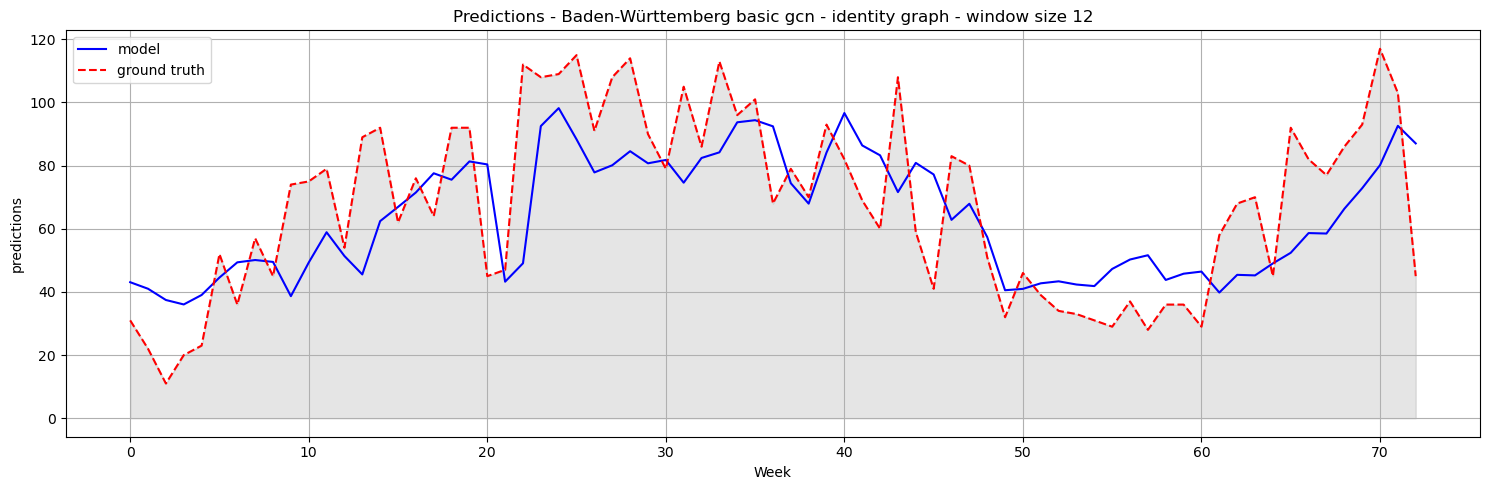

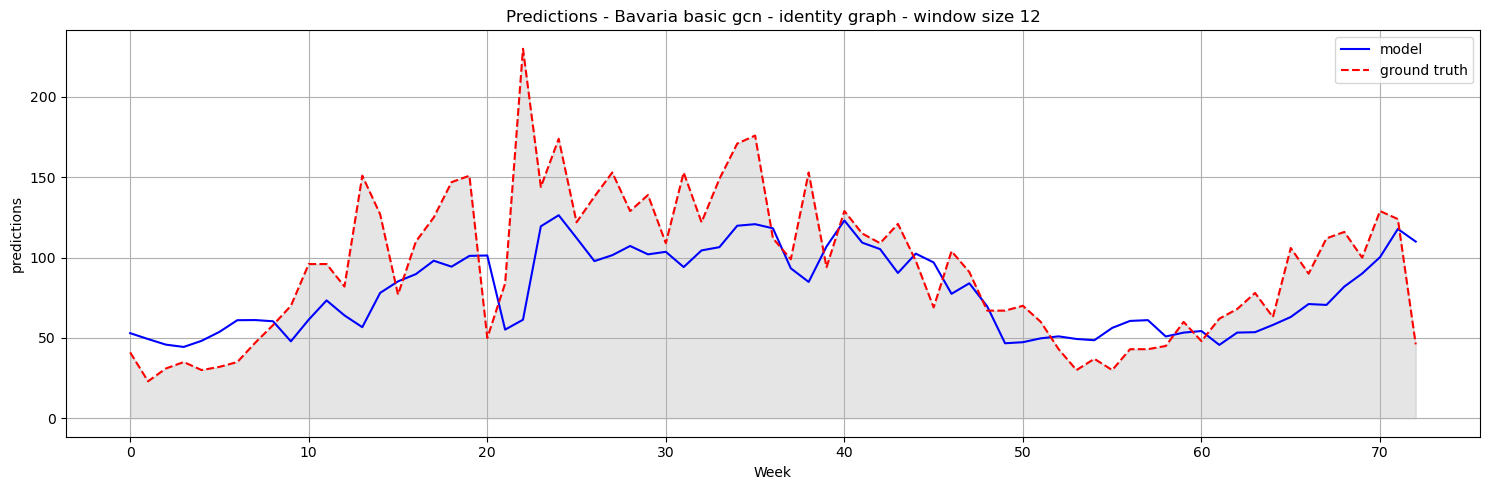

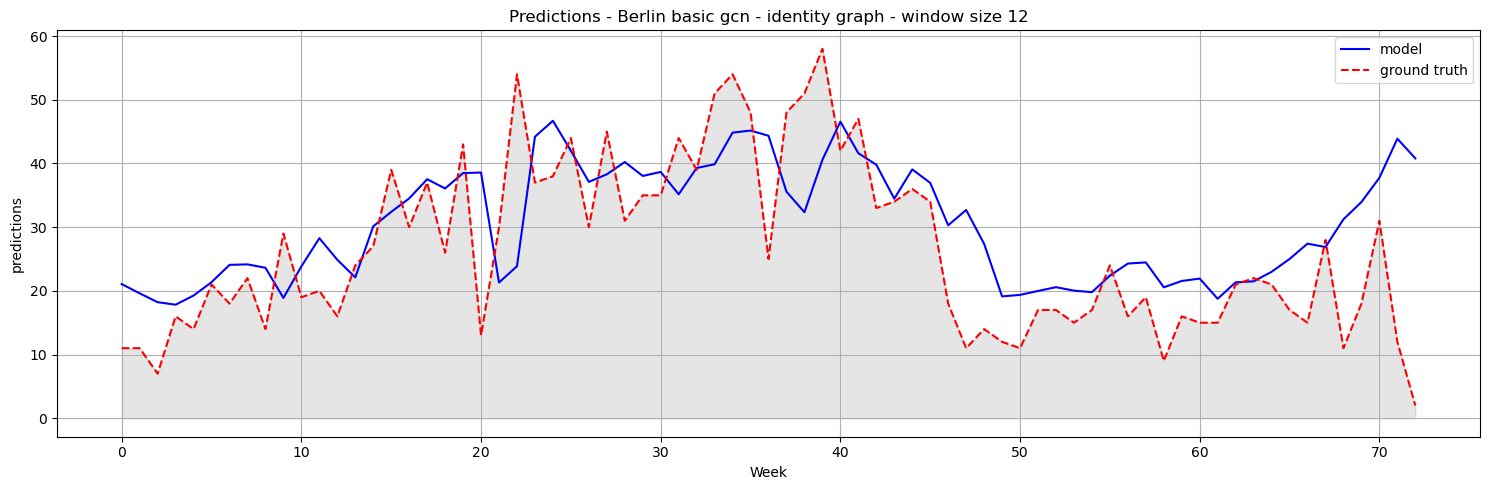

In [ ]:
trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= 2,
                        graph_type = 'annual',
                        threshold = 0.0)  

trialrun_model =   BasicGNNModel(input_dim = 2,
                                hidden_dim = 16,
                                dataloader = trialrun,
                                optimizer_class=torch.optim.Adam,
                                criterion=torch.nn.MSELoss(),
                                dropout = 0.25,
                                lr=0.0001,
                                updates = True
)     
trialrun_model.train(epochs = 100)
trialrun_model.evaluate()
modeltype = " basic gcn - identity graph - window size 2"
trialrun_model.plot_predictions(0, added_text = modeltype)
trialrun_model.plot_predictions(1, added_text = modeltype)
trialrun_model.plot_predictions(2, added_text = modeltype)

In [ ]:
trialrun = DataLoader(raw_data = data_to_load,
                        val_ratio = 0.2, 
                        test_ratio= 0.2,
                        standardization_method= 'zscore',
                        window_size= 12,
                        graph_type = 'identity')  

trialrun_model =   BasicGNNModel(input_dim = 12,
                                hidden_dim = 16,
                                dataloader = trialrun,
                                optimizer_class=torch.optim.Adam,
                                criterion=torch.nn.MSELoss(),
                                dropout = 0.25,
                                lr=0.0001,
                                updates = True
)     
trialrun_model.train(epochs = 100)
trialrun_model.evaluate()
modeltype = " basic gcn - identity graph - window size 12"
trialrun_model.plot_predictions(0, added_text = modeltype)
trialrun_model.plot_predictions(1, added_text = modeltype)
trialrun_model.plot_predictions(2, added_text = modeltype)